# LoanDataFromProsper Analysis
## by Azubuogu Peace Udoka




## Investigation Overview

The purpose of the analysis is to find the effects of APR, Loan original amount and ontime payments for charged off loans of unemployed borrowers.


## Dataset Overview


The loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#set general style of plots
sns.set(rc = {'figure.figsize':(20,8)}, style="white", font_scale=1.5)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:

# load dataset
data = pd.read_csv("prosperLoanData.csv") 


In [3]:
#first, rename the ProsperRating (numeric) column to ProperRating to avoid errors that could occur due to the space.
#Note, you can use backicks quoting (`...`) instead however, I would rather just have a shorter column name to work with

data = data.rename(columns = {"ListingCategory (numeric)": "ListingCategory"})
data = data.rename(columns = {"ProsperRating (numeric)": "ProsperRating"})

#trim the dataset and select columns of interest into anew DataFrame

loan_data = data[["LoanStatus", "BorrowerAPR", "ProsperRating", "ListingCategory", "EmploymentStatus", "IsBorrowerHomeowner", "CurrentlyInGroup", "TotalCreditLinespast7years", "IncomeRange", "IncomeVerifiable", "TotalProsperLoans", "OnTimeProsperPayments", "LoanOriginalAmount", "Recommendations"]]


## Distribution of Unemployed Borrowers Based On LoanStatus

A good number of unemployed borrowers from Prosper had their loans charged off.


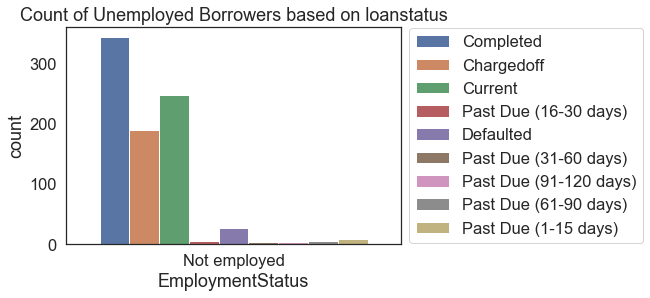

In [4]:
#filter dataset to generate new dataframe of unemployed borrowers and plot
unemployed = loan_data[loan_data["EmploymentStatus"]=="Not employed"]
sns.countplot(data = unemployed, x = "EmploymentStatus", hue = "LoanStatus");
plt.title("Count of Unemployed Borrowers based on loanstatus");

# Put the legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Effect of Prosper Ratings and APR

The distribution below shows a negative correlation between the prosper rating and APR of a charged off loan. That is higher APRs for charged off loans were associated with lower prosper ratings. A low prosper rating already assumes a low risk and this could explain why lenders would charged off these loans. 



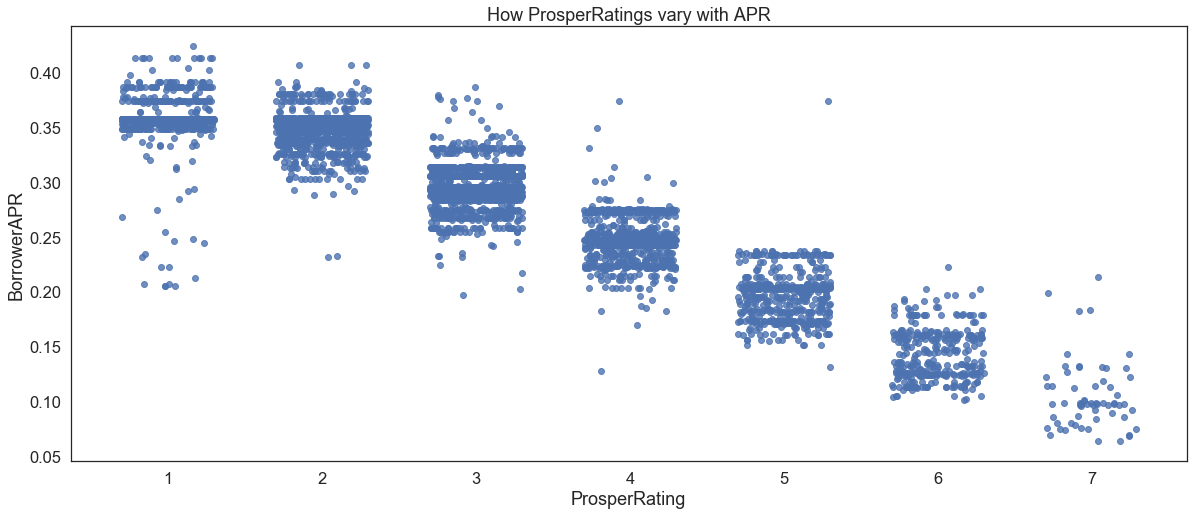

In [5]:
#filter the dataset to get loans with status of interest
list = ["Defaulted", "Chargedoff", "Cancelled"]
loan_data = loan_data[loan_data["LoanStatus"].isin(list)]

#plot of prosper ratings and borrower APR
plt.figure(figsize=(20,8));
sns.regplot(data = loan_data[loan_data["LoanStatus"]=="Chargedoff"],x= "ProsperRating", y = "BorrowerAPR", fit_reg = False, x_jitter =0.3);
plt.title("How ProsperRatings vary with APR");


## Original Amount of Charged off Loans 

To better understand why lenders chose to charge off loans of high APR despite the low risk, a plot of loan original amount is made and it can be seen that most of the charged off loans are actually loans of small amounts.

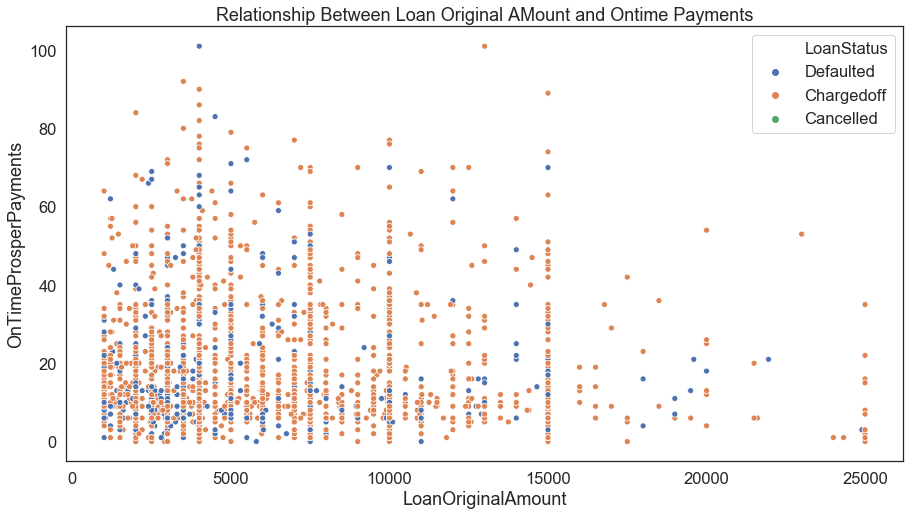

In [6]:
plt.figure(figsize = (15,8));

sns.scatterplot(data = loan_data,x= "LoanOriginalAmount", y = "OnTimeProsperPayments",color = "green", hue = "LoanStatus");
plt.title("Relationship Between Loan Original AMount and Ontime Payments");


## Chargedoff Loans and OntimeProsperPayments

On further analysis, you can see that charged off loans are also associated with more total prosper loans and a higher range of Prosper payments made on time. 


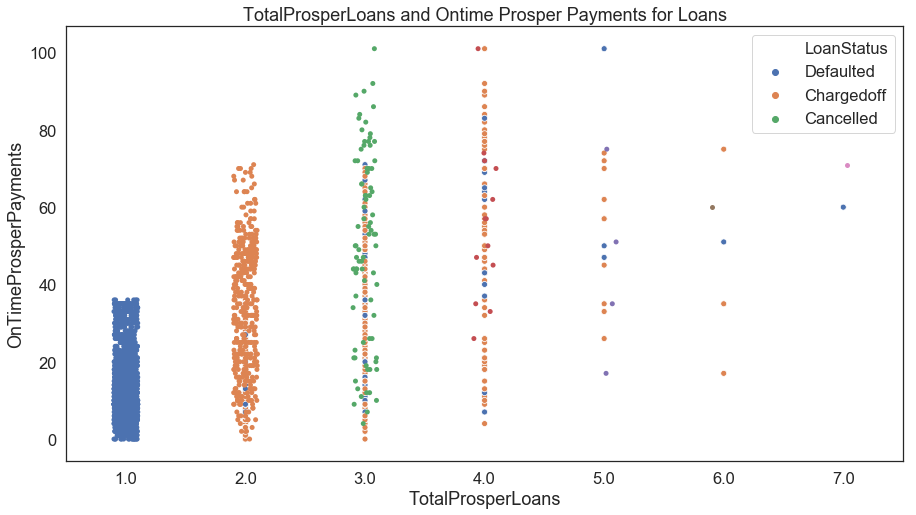

In [7]:
plt.figure(figsize = (15,8))

sns.scatterplot(data = loan_data,x= "TotalProsperLoans", y = "OnTimeProsperPayments",color = "green", hue = "LoanStatus");
sns.stripplot(data = loan_data,x= "TotalProsperLoans", y = "OnTimeProsperPayments");
plt.title("TotalProsperLoans and Ontime Prosper Payments for Loans");

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert LoanDataFromProsper_slide_deck.ipynb --to slides --post serve --no-input --no-prompt